In [1]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#!pip install bertopic[visualization]

In [5]:
import json
from bertopic import BERTopic
import numpy as np
import pandas as pd

from gensim.models import Word2Vec

## **Modelo sin preprocesamiento**

Leer Tweets extraídos

In [ ]:
def extraer_cuentas_y_twets_usuarios_json(lista_cuentas, lista_tweets, diccionario_tweets):
    with open("tweets.json", 'r') as fp:
        diccionario_tweets = json.load(fp)
        for i in range(len(diccionario_tweets['data'].keys())):
            lista_cuentas.append(diccionario_tweets['includes'][str(i)])
            lista_tweets.append(diccionario_tweets['data'][str(i)]['text'])

        print('Cantidad: ',len(lista_cuentas))
        return len(diccionario_tweets['data'])

In [ ]:
with open("tweets.json") as fp:
    diccionario_tweets = json.load(fp)

In [ ]:
cuentas_usuarios = []
tweets = []
diccionario_tweets = {'data':{}, 'includes':{}}
extraer_cuentas_y_twets_usuarios_json(cuentas_usuarios, tweets, diccionario_tweets)

Cantidad:  9788


9788

In [ ]:
tweets[0]

'quiero llorar d lo mal q m siento'

In [ ]:
model = BERTopic(language='spanish', calculate_probabilities=True)
topics, probabilities = model.fit_transform(tweets)

In [ ]:
model.get_topic_freq().head()

,Topic,Count
0,-1,3728
1,0,493
2,1,285
3,2,283
4,3,261


In [ ]:
model.get_topic(0)

[('llorar', 0.04684933608403646),
 ('quiero', 0.028799660782294123),
 ('ganas', 0.020444276852154383),
 ('voy', 0.019564912859642538),
 ('me', 0.017088101477124414),
 ('no', 0.012548769000308218),
 ('tengo', 0.012371572783326694),
 ('mi', 0.011268978496563355),
 ('de', 0.010785946406115852),
 ('en', 0.010446747144097367)]

In [ ]:
model.save("my_model")

In [ ]:
model.visualize_topics()

In [ ]:
model.visualize_distribution(probabilities[0])

### **Segunda parte**
Leeré los comentarios clasificados, buscaré en qué tópico cayeron y trataré de indentificar los tópicos con más personas que tienen algún problema.

In [ ]:
nombre_archivo_clasificacion = "clasificacion.txt"

In [ ]:
contenido = list()
with open(nombre_archivo_clasificacion, 'r+') as archivo:
    contenido = archivo.readlines()

In [ ]:
contenido

In [ ]:
cont = int(contenido.pop())
problemas_mentales = list(map(lambda x : 1 if (x[0:1]) == 's' else 0, contenido))

In [ ]:
problemas_mentales = np.asarray(problemas_mentales)

In [ ]:
sum(problemas_mentales)

In [ ]:
topicos_documentos_clasificados = model.topics_[:cont]

In [ ]:
topicos_documentos_clasificados = np.asarray(topicos_documentos_clasificados)

In [ ]:
topicos_documentos_depresivos = topicos_documentos_clasificados[problemas_mentales == 1]

In [ ]:
len(topicos_documentos_depresivos)

In [ ]:
topicos_documentos_depresivos

In [ ]:
topicos_documentos_depresivos_limpio = [x for x in topicos_documentos_depresivos if x != -1]

In [ ]:
import matplotlib.pyplot as plt

plt.hist(topicos_documentos_depresivos_limpio)
plt.show

In [ ]:
model.get_topic(1)

Ver el tamaño de los topicos

In [ ]:
model.topic_sizes_

Porcentaje de comentarios con transtorno por tópico

In [ ]:
from collections import Counter

counter = Counter(topicos_documentos_depresivos_limpio)

In [ ]:
counter

In [ ]:
cantidad_documentos_por_topico = model.topic_sizes_

In [ ]:
topicos_con_transtorno = list(counter.keys())

In [ ]:
topicos_con_transtorno

In [ ]:
for i in topicos_con_transtorno:
  print("{:<5} {:>5.2f}%".format(i, (counter[i] / cantidad_documentos_por_topico[i])*100))

In [ ]:
model.get_topic(102)

In [ ]:
model.get_topic(6)

## **Ahora voy a crear otro modelo con palabras y cosas básicas corregidas**

In [ ]:
import pandas as pd

df = pd.read_csv("processed_tweets.csv")
df.head()

In [ ]:
model2 = BERTopic(language='spanish', calculate_probabilities=True)
topics2, probabilities2 = model2.fit_transform(df['Comentarios'])

In [ ]:
model2.get_topic_freq().head()

In [ ]:
model2.save("my_model_2")

In [ ]:
model2.visualize_topics()

In [ ]:
model2.visualize_distribution(probabilities2[0])

In [ ]:
model2.reduce_topics(df['Comentarios'], nr_topics=60)

In [ ]:
model2.visualize_topics()

## **Ahora voy a crear otro modelo con preprocesamiento total**

In [6]:
#df2 = pd.read_csv("totally_processed_tweets.csv")
df2 = pd.read_csv("totally_processed_tweets_well_complete.csv")
df2.head()

,Unnamed: 0,Comentarios,Depresivo,TweetPre,Idioma
0,7,Estoy ansioso nea 💔🔥,1,ansioso nea,es
1,8,Tw: s4ngr3 \nUna de las cosas que odio cuando ...,1,te s nor cosas odio viene mucha ansiedad termi...,es
2,14,Necesito un estómago nuevo o aprender a ser me...,1,necesito estomago nuevo aprender ser menos est...,es
3,16,@Elenaruemorgue Ninguno oficial (no vaya a ser...,1,ninguno oficial vaya ser salud mental publica ...,es
4,28,"Si algún día me gana la depresión y me voy, qu...",1,si algun dia gana depresion voy quiero sepas g...,es


In [7]:
df2['TweetPre'].isnull().sum()

0

In [8]:
len(df2)

5560

In [9]:
#df2 = df2.iloc[0:5000]

In [10]:
len(df2)

5560

In [11]:
df2.describe()

,Unnamed: 0,Depresivo
count,5560.000000,5560.000000
mean,3375.990468,0.059353
std,2051.631189,0.236305
min,2.000000,0.000000
25%,1541.500000,0.000000
50%,3318.500000,0.000000
75%,5149.250000,0.000000
max,6999.000000,1.000000


In [12]:
model3 = BERTopic(language='spanish', calculate_probabilities=True)
model3.fit_transform(list(df2[df2['TweetPre'].notnull()]['TweetPre']))

Downloading:   0%|          | 0.00/968 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.79k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/645 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/471M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/480 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

([15,
  -1,
  -1,
  0,
  4,
  0,
  4,
  0,
  4,
  45,
  0,
  0,
  -1,
  0,
  4,
  0,
  -1,
  0,
  45,
  4,
  42,
  0,
  -1,
  0,
  45,
  0,
  82,
  0,
  0,
  4,
  -1,
  4,
  0,
  45,
  0,
  0,
  0,
  82,
  0,
  4,
  36,
  0,
  0,
  0,
  0,
  4,
  4,
  42,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  30,
  0,
  -1,
  0,
  0,
  0,
  4,
  4,
  -1,
  0,
  0,
  0,
  0,
  4,
  0,
  4,
  0,
  0,
  4,
  0,
  45,
  -1,
  4,
  4,
  -1,
  0,
  4,
  7,
  -1,
  4,
  0,
  4,
  0,
  4,
  27,
  4,
  0,
  -1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  4,
  0,
  0,
  4,
  0,
  -1,
  -1,
  0,
  0,
  0,
  0,
  4,
  4,
  0,
  0,
  4,
  14,
  0,
  0,
  0,
  0,
  45,
  0,
  4,
  0,
  -1,
  0,
  0,
  -1,
  4,
  45,
  42,
  4,
  0,
  0,
  -1,
  0,
  0,
  -1,
  4,
  0,
  0,
  4,
  4,
  0,
  82,
  0,
  0,
  0,
  0,
  0,
  0,
  -1,
  0,
  4,
  45,
  4,
  7,
  0,
  4,
  0,
  0,
  0,
  0,
  45,
  0,
  -1,
  0,
  0,
  0,
  0,
  -1,
  0,
  1,
  -1,
  0,
  4,
  4,
  0,
  4,
  4

In [13]:
topics3, probabilities3 = model3.topics_, model3.probabilities_

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5560 entries, 0 to 5559
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   5560 non-null   int64 
 1   Comentarios  5560 non-null   object
 2   Depresivo    5560 non-null   int64 
 3   TweetPre     5560 non-null   object
 4   Idioma       5560 non-null   object
dtypes: int64(2), object(3)
memory usage: 217.3+ KB


In [15]:
df2.head()

,Unnamed: 0,Comentarios,Depresivo,TweetPre,Idioma
0,7,Estoy ansioso nea 💔🔥,1,ansioso nea,es
1,8,Tw: s4ngr3 \nUna de las cosas que odio cuando ...,1,te s nor cosas odio viene mucha ansiedad termi...,es
2,14,Necesito un estómago nuevo o aprender a ser me...,1,necesito estomago nuevo aprender ser menos est...,es
3,16,@Elenaruemorgue Ninguno oficial (no vaya a ser...,1,ninguno oficial vaya ser salud mental publica ...,es
4,28,"Si algún día me gana la depresión y me voy, qu...",1,si algun dia gana depresion voy quiero sepas g...,es


In [16]:
model3.get_topic_freq().head()

,Topic,Count
0,-1,2405
1,0,180
2,1,162
3,2,150
4,3,131


In [17]:
#model3.save("my_model_3")

In [18]:
model3.visualize_topics()

In [19]:
model3.visualize_distribution(probabilities3[0])

In [20]:
model3.reduce_topics(list(df2[df2['TweetPre'].notnull()]['TweetPre']), nr_topics=20)

In [21]:
topics3, probabilities3 = model3.topics_, model3.probabilities_

In [22]:
model3.visualize_topics()

### **Segunda parte**
Leeré los comentarios clasificados, buscaré en qué tópico cayeron y trataré de indentificar los tópicos con más personas que tienen algún problema.

In [23]:
#nombre_archivo_clasificacion = "clasificacion.txt"

In [24]:
#contenido = list()
#with open(nombre_archivo_clasificacion, 'r+') as archivo:
#    contenido = archivo.readlines()

In [25]:
#contenido

In [26]:
#cont = int(contenido.pop())
#problemas_mentales = list(map(lambda x : 1 if (x[0:1]) == 's' else 0, contenido))

In [27]:
problemas_mentales = np.asarray(df2['Depresivo'])

In [28]:
cont = len(problemas_mentales)
cont

5560

In [29]:
len(model3.topics_)

5560

In [30]:
topicos_documentos_clasificados = model3.topics_[:cont]

In [31]:
topicos_documentos_clasificados = np.asarray(topicos_documentos_clasificados)

In [32]:
topicos_documentos_depresivos = topicos_documentos_clasificados[problemas_mentales == 1]

In [33]:
len(topicos_documentos_depresivos)

330

In [34]:
topicos_documentos_depresivos

array([17, -1, -1,  0,  7,  0,  7,  0,  7,  0,  0,  0, -1,  0,  7,  0, -1,
        0,  0,  7, -1,  0, -1,  0,  0,  0, -1,  0,  0,  7, -1,  7,  0,  0,
        0,  0,  0, -1,  0,  7, -1,  0,  0,  0,  0,  7,  7, -1,  0,  0,  0,
        0,  0,  0,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,
        0,  0,  7,  7, -1,  0,  0,  0,  0,  7,  0,  7,  0,  0,  7,  0,  0,
       -1,  7,  7, -1,  0,  7,  9, -1,  7,  0,  7,  0,  7, -1,  7,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0,  7,  0, -1, -1,  0,
        0,  0,  0,  7,  7,  0,  0,  7, 15,  0,  0,  0,  0,  0,  0,  7,  0,
       -1,  0,  0, -1,  7,  0, -1,  7,  0,  0, -1,  0,  0, -1,  7,  0,  0,
        7,  7,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  7,  0,  7,  9,  0,
        7,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  1, -1,  0,
        7,  7,  0,  7,  7, -1, -1,  0,  0,  0, -1,  7,  0,  7,  7,  0, -1,
        0,  7,  7,  7,  7, -1,  0,  0,  0,  0,  7,  0, -1,  7,  0,  0, -1,
        0, -1,  0,  0,  0

In [35]:
topicos_documentos_depresivos_limpio = [x for x in topicos_documentos_depresivos if x != -1]

<function matplotlib.pyplot.show(*args, **kw)>

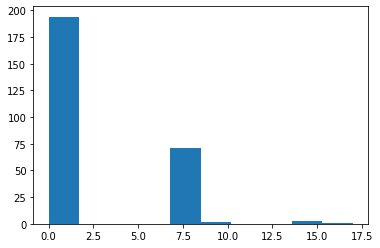

In [36]:
import matplotlib.pyplot as plt

plt.hist(topicos_documentos_depresivos_limpio)
plt.show

In [37]:
#model3.get_topic(1)

Ver el tamaño de los topicos

In [38]:
model3.topic_sizes_

{-1: 3770,
 0: 202,
 1: 190,
 2: 150,
 3: 131,
 4: 100,
 5: 79,
 6: 78,
 7: 78,
 8: 74,
 9: 73,
 10: 70,
 11: 69,
 12: 68,
 13: 68,
 14: 64,
 15: 64,
 16: 61,
 17: 59,
 18: 57,
 19: 55}

Porcentaje de comentarios con transtorno por tópico

In [39]:
from collections import Counter

counter = Counter(topicos_documentos_depresivos_limpio)

In [40]:
counter

Counter({17: 1, 0: 193, 7: 71, 9: 2, 15: 1, 1: 1, 14: 2})

In [41]:
cantidad_documentos_por_topico = model3.topic_sizes_

In [42]:
topicos_con_transtorno = list(counter.keys())

In [43]:
topicos_con_transtorno

[17, 0, 7, 9, 15, 1, 14]

In [44]:
for i in topicos_con_transtorno:
  print("{:<5} {:>5.2f}%".format(i, (counter[i] / cantidad_documentos_por_topico[i])*100))

17     1.69%
0     95.54%
7     91.03%
9      2.74%
15     1.56%
1      0.53%
14     3.12%


In [45]:
model3.get_topic(1)

[('madrid', 0.05954269971995228),
 ('ma', 0.025507302990802262),
 ('gh', 0.022592750898133982),
 ('real', 0.022407262359116612),
 ('firstdates', 0.018784794988386668),
 ('bla', 0.018347303846967557),
 ('si', 0.017995116856417883),
 ('nacho', 0.01702035839407873),
 ('va', 0.017009288666607763),
 ('general', 0.015520261927118395)]

In [46]:
model3.get_topic(3)

[('venezuela', 0.07674693871993575),
 ('mexico', 0.04319477330342591),
 ('venezuelafortalecida', 0.03522865535183038),
 ('nov', 0.03438090822897654),
 ('colombia', 0.03227711065487476),
 ('peru', 0.031184460431147695),
 ('chile', 0.029848720779273044),
 ('pais', 0.02718424665642097),
 ('cuba', 0.023562008389719852),
 ('colombiano', 0.020243606471644082)]

## **Ahora voy a implementar lo realizado en los papers**
Voy a usar los embedings de BERTopic y los embedings normales.

In [47]:
len(probabilities3)

5560

In [48]:
datos = df2['Comentarios']
datos.head()

0                                 Estoy ansioso nea 💔🔥
1    Tw: s4ngr3 \nUna de las cosas que odio cuando ...
2    Necesito un estómago nuevo o aprender a ser me...
3    @Elenaruemorgue Ninguno oficial (no vaya a ser...
4    Si algún día me gana la depresión y me voy, qu...
Name: Comentarios, dtype: object

In [49]:
datos = [i.split(' ') for i in datos]

In [50]:
datos[0:2]

[['Estoy', 'ansioso', 'nea', '💔🔥'],
 ['Tw:',
  's4ngr3',
  '\nUna',
  'de',
  'las',
  'cosas',
  'que',
  'odio',
  'cuando',
  'me',
  'viene',
  'mucha',
  'ansiedad',
  'es',
  'terminar',
  'con',
  'la',
  'piel,',
  'labios,...',
  'En',
  'la',
  'mierda',
  '\nOsea',
  'en',
  'la',
  'siguiente',
  'foto',
  'mi',
  'labio',
  'con',
  'otra',
  'herida',
  'añadida',
  'a',
  'la',
  'lista',
  '😭']]

In [54]:
#w2v_model = Word2Vec(min_count=40, window=1, vector_size=26, sample=6e-5, alpha=0.03, min_alpha=0.0007)
w2v_model = Word2Vec(min_count=1, window=1, vector_size=26, sample=6e-5, alpha=0.03, min_alpha=0.0007)
w2v_model.build_vocab(datos, progress_per=10000)
w2v_model.train(datos, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(1648820, 2839440)

In [55]:
model1 = Word2Vec(datos, min_count = 1, window = 5, sg=0) 

In [56]:
average_vectors = []
for d in datos:
    v = np.zeros(26)
    for word in d:
        v += w2v_model.wv[word]
    average_vectors.append(list(v / len(d)))

In [57]:
len(average_vectors)

5560

In [58]:
len(probabilities3)

5560

### Ahora si puedo combinar los vectores y pasarlos a un algoritmo de ML

En el paper árabe dicen que los unen, usando FeatureUnion

In [59]:
#from sklearn.pipeline import FeatureUnion

In [60]:
#union = FeatureUnion([("Word2Vec",  Word2Vec(min_count=40, window=1, vector_size=26, sample=6e-5, alpha=0.03, min_alpha=0.0007)),
#                       ("BERTopic", BERTopic(language='spanish', calculate_probabilities=True))])

In [61]:
combinacion = []
for i in range(len(probabilities3)):
    average_vectors[i].extend(probabilities3[i])
    combinacion.append(average_vectors[i])

In [62]:
len(combinacion)

5560

In [63]:
clases = df2['Depresivo']
clases

0       1
1       1
2       1
3       1
4       1
       ..
5555    0
5556    0
5557    0
5558    0
5559    0
Name: Depresivo, Length: 5560, dtype: int64

In [64]:
sum(clases)

330

In [65]:
dataset = pd.DataFrame({'Vectores': combinacion, 'Clase': clases})
dataset.head()

,Vectores,Clase
0,"[0.07918814150616527, 0.43832582235336304, -0....",1
1,"[0.11397872491412468, 0.7295268969358625, 0.02...",1
2,"[0.10060794142385324, 0.6709553182125092, 0.01...",1
3,"[0.09998048010112887, 0.6309927393766966, 0.01...",1
4,"[0.11515033710747957, 0.7339345330283755, 0.00...",1


In [66]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

from sklearn import metrics

In [67]:
X_train,X_test,y_train,y_test = train_test_split(dataset['Vectores'], dataset['Clase'],test_size = 0.2,)#random_state = 324)

In [68]:
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(list(X_train), y_train)

SVC(kernel='linear')

In [69]:
prediction_linear_train = classifier_linear.predict(list(X_train))
# results
print(classification_report(y_train, prediction_linear_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4186
           1       0.94      0.72      0.81       262

    accuracy                           0.98      4448
   macro avg       0.96      0.86      0.90      4448
weighted avg       0.98      0.98      0.98      4448



[[4173   13]
 [  74  188]]


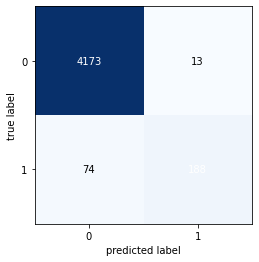

In [70]:
cf = metrics.confusion_matrix(y_train,prediction_linear_train,labels = [0,1])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [71]:
prediction_linear_test = classifier_linear.predict(list(X_test))
# results
print(classification_report(y_test, prediction_linear_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1044
           1       0.98      0.82      0.90        68

    accuracy                           0.99      1112
   macro avg       0.99      0.91      0.94      1112
weighted avg       0.99      0.99      0.99      1112



[[1043    1]
 [  12   56]]


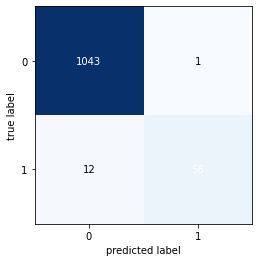

In [72]:
cf = metrics.confusion_matrix(y_test,prediction_linear_test,labels = [0,1])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

Ahora veré cómo funcionan solo con los embeddings

In [73]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(average_vectors, dataset['Clase'],test_size = 0.2,random_state = 324)

In [74]:
# Perform classification with SVM, kernel=linear
classifier_linear2 = svm.SVC(kernel='linear')
classifier_linear2.fit(list(X_train2), y_train2)

SVC(kernel='linear')

In [75]:
prediction_linear_train2 = classifier_linear2.predict(list(X_train2))
# results
print(classification_report(y_train2, prediction_linear_train2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4176
           1       0.95      0.77      0.85       272

    accuracy                           0.98      4448
   macro avg       0.97      0.88      0.92      4448
weighted avg       0.98      0.98      0.98      4448



[[4166   10]
 [  63  209]]


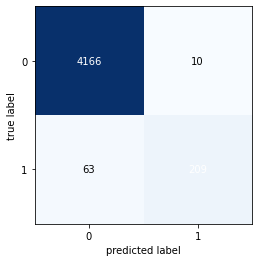

In [76]:
cf = metrics.confusion_matrix(y_train2, prediction_linear_train2,labels = [0,1])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [77]:
prediction_linear_test2 = classifier_linear2.predict(list(X_test2))
# results
print(classification_report(y_test2, prediction_linear_test2))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1054
           1       0.90      0.60      0.72        58

    accuracy                           0.98      1112
   macro avg       0.94      0.80      0.85      1112
weighted avg       0.97      0.98      0.97      1112



[[1050    4]
 [  23   35]]


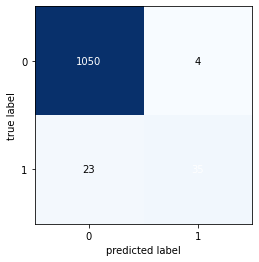

In [78]:
cf = metrics.confusion_matrix(y_test2,prediction_linear_test2,labels = [0,1])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()